/tmp/ipykernel_3890579/3706601456.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


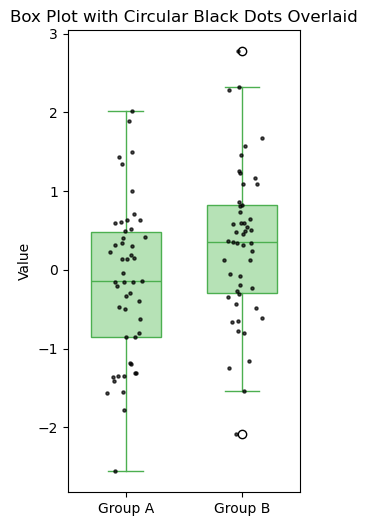

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)
group_a = np.random.normal(loc=-0.2, scale=1, size=50)
group_b = np.random.normal(loc=0.3, scale=1, size=50)

fig, ax = plt.subplots(figsize=[3,6])
box = ax.boxplot(
    [group_a, group_b],
    labels=['Group A', 'Group B'],
    patch_artist=True,
    widths=0.6,
    zorder=1  # Ensure the box plot is behind the scatter
)

# Light green boxes with dark green outlines
for patch in box['boxes']:
    patch.set(facecolor='#b6e2b6', edgecolor='#4caf50', zorder=1)
for element in ['medians', 'caps', 'whiskers']:
    plt.setp(box[element], color='#4caf50', zorder=1)

# Scatter points: circular, filled, black, drawn on top
x_positions = [1, 2]
jitter_strength = 0.08
for i, group in enumerate([group_a, group_b], start=1):
    jittered_x = np.random.normal(loc=i, scale=jitter_strength, size=len(group))
    ax.scatter(
        jittered_x, group,
        color='black', alpha=0.7, s=5,
        marker='o', zorder=2  # circular filled marker, drawn on top
    )

ax.set_title('Box Plot with Circular Black Dots Overlaid')
ax.set_ylabel('Value')
plt.savefig('attention_head4.svg')
plt.show()

### Loss curves

In [28]:
import numpy as np
cell_set = np.load('cell_set_scaling.npz')
pb = np.load('psbk_and_maskattn_losses.npz')

In [33]:
list(cell_set.keys())

['cs1_x',
 'cs1_y',
 'cs16_x',
 'cs16_y',
 'cs32_x',
 'cs32_y',
 'cs64_x',
 'cs64_y',
 'cs128_x',
 'cs128_y',
 'cs256_x',
 'cs256_y',
 'cs512_x',
 'cs512_y']

In [34]:
list(pb.keys())

['psbk_x', 'psbk_y', 'maskattn_x', 'maskattn_y']

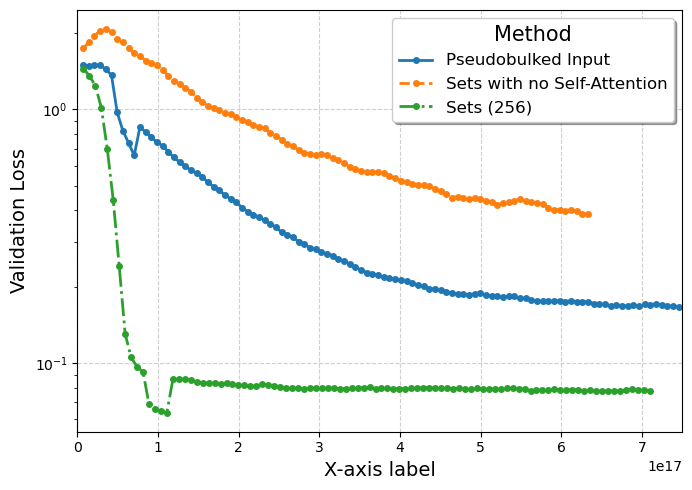

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# Plot each line with style
plt.plot(pb['psbk_x'], pb['psbk_y'], label='Pseudobulked Input', linewidth=2, linestyle='-', marker='o', markersize=4)
plt.plot(pb['maskattn_x'], pb['maskattn_y'], label='Sets with no Self-Attention', linewidth=2, linestyle='--', marker='o', markersize=4)
plt.plot(cell_set['cs256_x'], cell_set['cs256_y'], label='Sets (256)', linewidth=2, linestyle='-.', marker='o', markersize=4)

# Axis labels and title
plt.xlabel('X-axis label', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
#plt.title('Comparison of Aggregation Strategies', fontsize=16, fontweight='bold')

# Legend styling
plt.legend(title='Method', fontsize=12, title_fontsize=15, loc='best', frameon=True, shadow=True)

# Grid, layout, and style
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([0.5, 0.75e18])

plt.tight_layout()
plt.yscale('log')
plt.savefig('pseduobulk.svg')
plt.show()


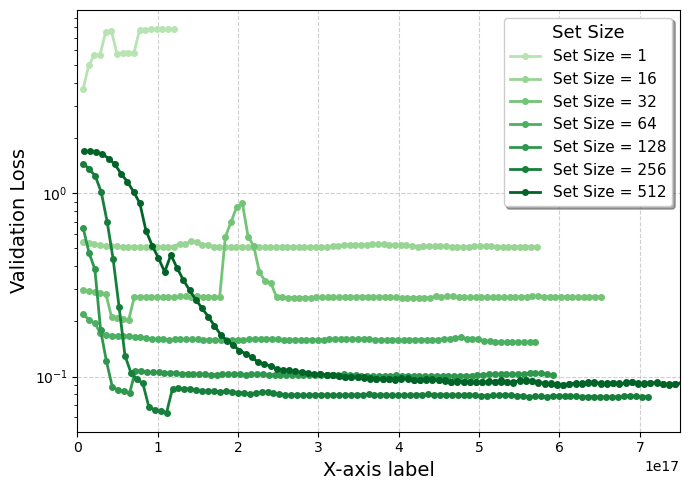

In [73]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define the set sizes and get corresponding greens from light to dark
set_sizes = [1, 16, 32, 64, 128, 256, 512]
greens = cm.Greens(np.linspace(0.3, 0.9, len(set_sizes)))  # avoid too light or too dark ends

plt.figure(figsize=(7, 5))

# Plot each set size using a loop
for i, size in enumerate(set_sizes):
    x = cell_set[f'cs{size}_x']
    y = cell_set[f'cs{size}_y']
    plt.plot(x, y,
             label=f'Set Size = {size}',
             color=greens[i],
             linewidth=2,
             linestyle='-',
             marker='o',
             markersize=4)

# Axis labels
plt.xlabel('X-axis label', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)

# Legend styling
plt.legend(title='Set Size', fontsize=11, title_fontsize=13, loc='best', frameon=True, shadow=True)

# Grid and formatting
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([0.5, 0.75e18])
plt.yscale('log')
plt.tight_layout()

# Save and show
plt.savefig('set_size.svg')
plt.show()


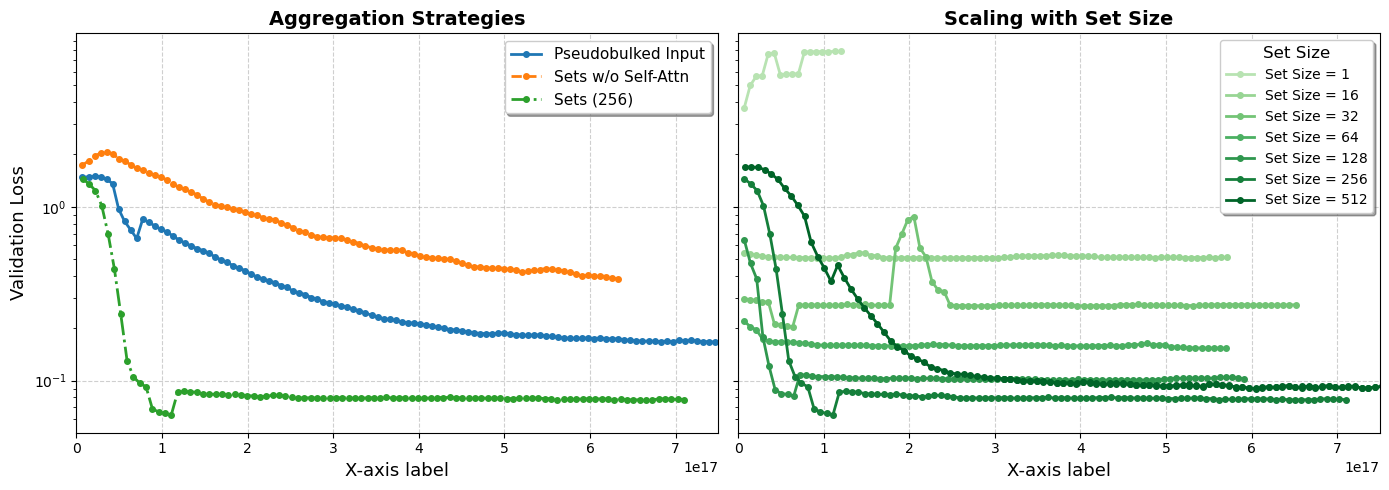

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Set sizes and colors
set_sizes = [1, 16, 32, 64, 128, 256, 512]
greens = cm.Greens(np.linspace(0.3, 0.9, len(set_sizes)))  # gradient green shades

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

### LEFT PLOT: Aggregation Strategy Comparison ###
axs[0].plot(pb['psbk_x'], pb['psbk_y'], label='Pseudobulked Input',
            linewidth=2, linestyle='-', marker='o', markersize=4)
axs[0].plot(pb['maskattn_x'], pb['maskattn_y'], label='Sets w/o Self-Attn',
            linewidth=2, linestyle='--', marker='o', markersize=4)
axs[0].plot(cell_set['cs256_x'], cell_set['cs256_y'], label='Sets (256)',
            linewidth=2, linestyle='-.', marker='o', markersize=4)

axs[0].set_xlabel('X-axis label', fontsize=13)
axs[0].set_ylabel('Validation Loss', fontsize=13)
axs[0].set_title('Aggregation Strategies', fontsize=14, fontweight='bold')
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].legend(fontsize=11, frameon=True, shadow=True, loc='best')
axs[0].set_xlim([0.5, 0.75e18])
axs[0].set_yscale('log')

### RIGHT PLOT: Set Size Scaling ###
for i, size in enumerate(set_sizes):
    x = cell_set[f'cs{size}_x']
    y = cell_set[f'cs{size}_y']
    axs[1].plot(x, y,
                label=f'Set Size = {size}',
                color=greens[i],
                linewidth=2,
                linestyle='-',
                marker='o',
                markersize=4)

axs[1].set_xlabel('X-axis label', fontsize=13)
axs[1].set_title('Scaling with Set Size', fontsize=14, fontweight='bold')
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].legend(title='Set Size', fontsize=10, title_fontsize=12, loc='best', frameon=True, shadow=True)
axs[1].set_xlim([0.5, 0.75e18])
axs[1].set_yscale('log')

### Finalize Layout ###
plt.tight_layout()
plt.savefig('combined_comparison.svg')
plt.show()


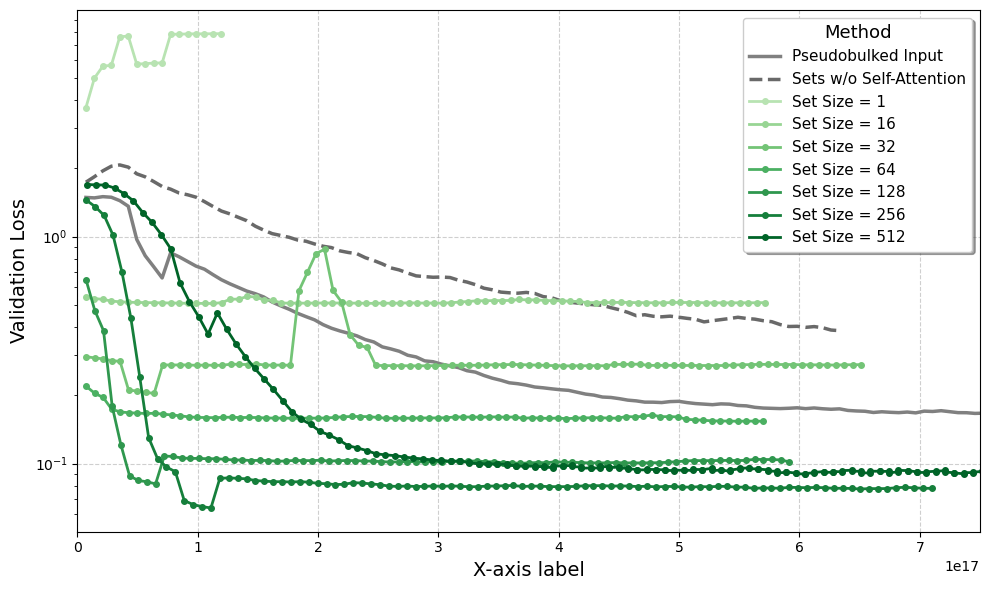

In [80]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(10, 6))

# ======= Baseline Curves (grays) =======
plt.plot(pb['psbk_x'], pb['psbk_y'],
         label='Pseudobulked Input',
         color='gray',
         linewidth=2.5,
         linestyle='-',
         #marker='o',
         markersize=5)

plt.plot(pb['maskattn_x'], pb['maskattn_y'],
         label='Sets w/o Self-Attention',
         color='dimgray',
         linewidth=2.5,
         linestyle='--',
         #marker='s',
         markersize=5)

# ======= Set Size Curves (greens) =======
set_sizes = [1, 16, 32, 64, 128, 256, 512]
greens = cm.Greens(np.linspace(0.3, 0.9, len(set_sizes)))

for i, size in enumerate(set_sizes):
    x = cell_set[f'cs{size}_x']
    y = cell_set[f'cs{size}_y']
    plt.plot(x, y,
             label=f'Set Size = {size}',
             color=greens[i],
             linewidth=2,
             linestyle='-',
             marker='o',
             markersize=4)

# ======= Labels and Aesthetics =======
plt.xlabel('X-axis label', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)

# Combine legend: show baseline first, then set size
handles, labels = plt.gca().get_legend_handles_labels()
# Manually order: baseline first
baseline_labels = ['Pseudobulked Input', 'Sets w/o Self-Attention']
baseline_handles = [handles[labels.index(lbl)] for lbl in baseline_labels]
setsize_handles = [h for h, l in zip(handles, labels) if l not in baseline_labels]
setsize_labels = [l for l in labels if l not in baseline_labels]

# Recombine and plot
plt.legend(baseline_handles + setsize_handles,
           baseline_labels + setsize_labels,
           title='Method',
           fontsize=11,
           title_fontsize=13,
           loc='best',
           frameon=True,
           shadow=True)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([0.5, 0.75e18])
plt.yscale('log')
plt.tight_layout()

# Save and display
plt.savefig('combined_setsize_baselines.svg')
plt.show()


In [81]:
loaded = np.load('state_scaling_losses.npz')

In [88]:
loaded

NpzFile 'state_scaling_losses.npz' with keys: arr_0